# COGS 108 - EDA Checkpoint

# Names

- Joonsung Park
- James Chung
- Richard Gross
- Madison Hambly
- Colin Lintereur

<a id='research_question'></a>
# Research Question

How do the most popular topics from previous COGS 108 final projects vary per quarter from 2019 to 2021? Also what other trends can we find in past submissions, like changes in word count, and number of graphs used?

# Setup

In [36]:
import pandas as pd
import glob as glob
import seaborn as sns
sns.set(font_scale=1, style="white")

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.cbook import boxplot_stats

plt.rcParams['figure.figsize'] = (20, 10)

# using glob to get all csvs
files = glob.glob('./csvs/*.csv')
df_total = pd.DataFrame()
entries = 0

# read all csvs to dataframes and combine into one df
for f_name in files:
    csv = pd.read_csv(f_name)
    df_total = df_total.append(csv)
    entries = entries + len(csv.index)

# remove artifact 'Unnamed'
# df_total = df_total.drop('Unnamed: 0', axis=1)

assert(len(df_total.index) == entries)
print('Observations: ' + str(len(df_total.index)))
df_total.head()

Observations: 364


,Group,Quarter,Year,Topic,Special,Word_Count,Graph_Count,Table_Count
0,1,FA,20,ARTS & CULTURE,False,7002,15,2
1,2,FA,20,BUSINESS,False,8689,18,16
2,4,FA,20,TECH,False,1864,13,5
3,5,FA,20,EDUCATION,False,5483,32,18
4,6,FA,20,GREEN,False,4595,19,7


# Data Cleaning

Since we are collecting the data ourselves, there is not much work to be done cleaning the data after collecting all of the csv files for each quarter and merging them together into one large dataset. One column we do need to remove however is a column named 'Unnamed: 0'. This column is an artifact of reading csv files that store index information for each dataset. This column is redundant in our new dataset so we can remove it.

In [24]:
# using glob to get all csvs
files = glob.glob('./csvs/*.csv')
df_total = pd.DataFrame()
entries = 0

# read all csvs to dataframes and combine into one df
for f_name in files:
    csv = pd.read_csv(f_name)
    df_total = df_total.append(csv)
    entries = entries + len(csv.index)

assert(len(df_total.index) == entries)
print('Observations: ' + str(len(df_total.index)))
df_total.head()

Observations: 364


,Group,Quarter,Year,Topic,Special,Word_Count,Graph_Count,Table_Count
0,1,FA,20,ARTS & CULTURE,False,7002,15,2
1,2,FA,20,BUSINESS,False,8689,18,16
2,4,FA,20,TECH,False,1864,13,5
3,5,FA,20,EDUCATION,False,5483,32,18
4,6,FA,20,GREEN,False,4595,19,7


# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

<AxesSubplot:xlabel='Topic', ylabel='Word_Count'>

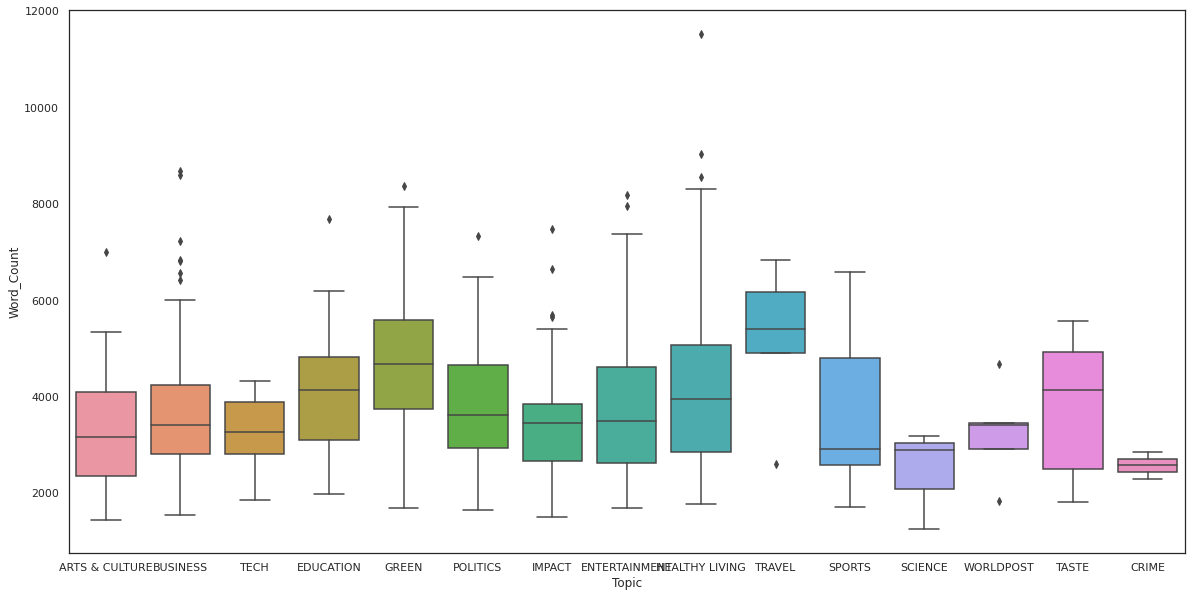

In [25]:
#wordcount boxplot per topic

df = df_total
sns.boxplot(x='Topic', y='Word_Count', data=df)

<AxesSubplot:xlabel='count', ylabel='Topic'>

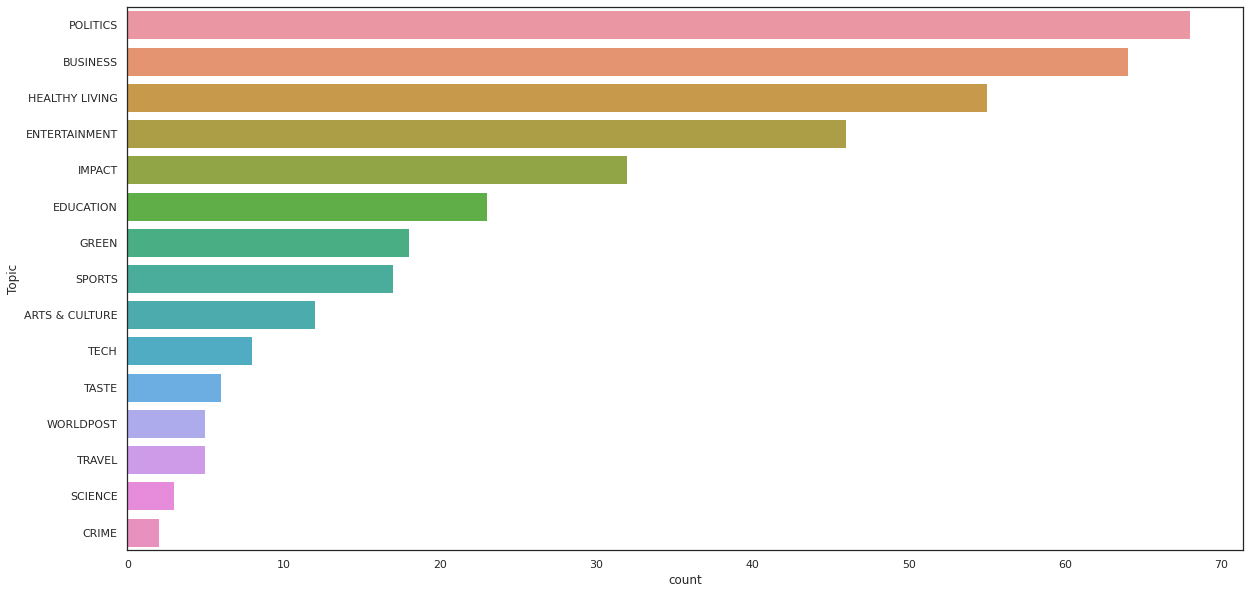

In [26]:
#Total amount of each topic

sns.countplot(y='Topic',data=df, order=df['Topic'].value_counts().index)

<AxesSubplot:xlabel='Topic', ylabel='count'>

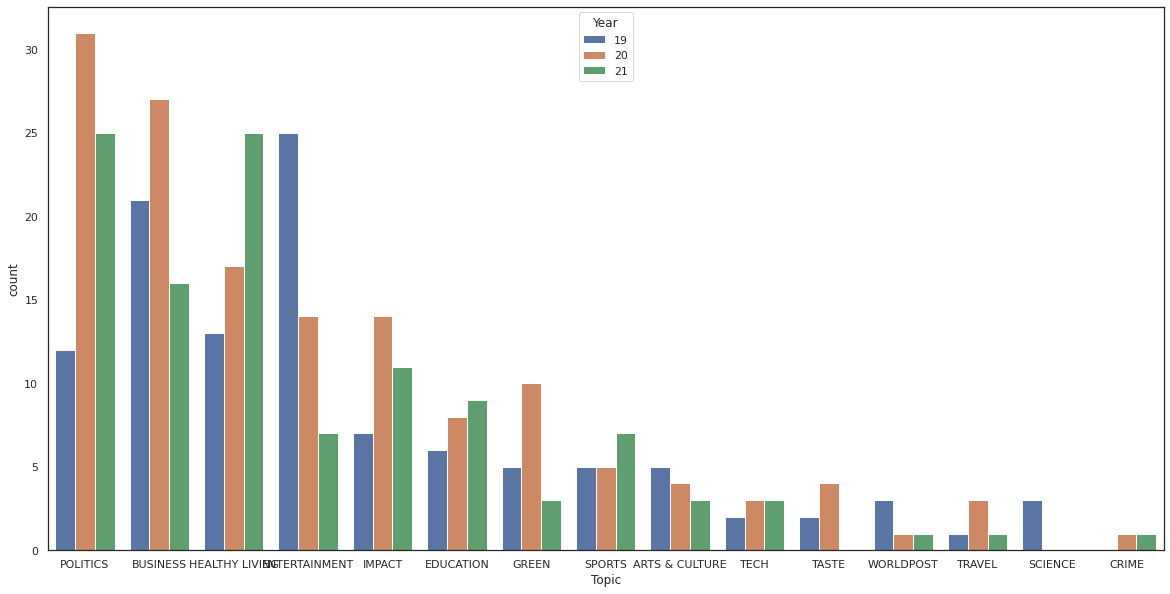

In [27]:
sns.countplot(x='Topic',data=df, hue='Year', order=df['Topic'].value_counts().index)

In [28]:
#Add chronological order to rows
chronological = []
#starting from spring 19 as 0, and incrementing, so that fall 19 is 1, winter 20 is 2
#spring 19: 0
#fall 20: 1
#winter 20: 2
#spring 20: 3
#winter 21: 4
#spring 21: 5
#
qtr_index_dict = {"SP19": 0, "FA20": 1, "WI20": 2, "SP20": 3, "WI21": 4, "SP21": 5}
qtr_index = []

for index, row in df.iterrows():
#     print(row['Quarter'], row['Year'])
    qtr = row['Quarter'] + str(row['Year'])
    qtr_index.append(qtr_index_dict[qtr])
    
print(qtr_index[:10])
df['Quarter_Index'] = qtr_index

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


<AxesSubplot:xlabel='Quarter_Index', ylabel='count'>

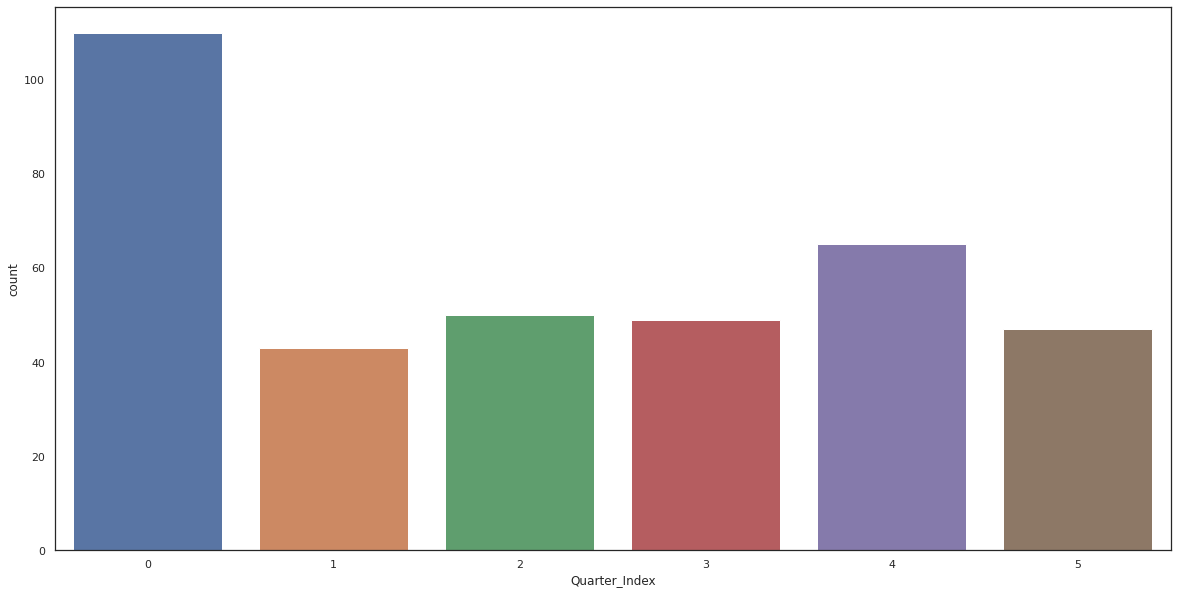

In [29]:
sns.countplot(x='Quarter_Index',data=df)

<AxesSubplot:xlabel='Quarter_Index', ylabel='Word_Count'>

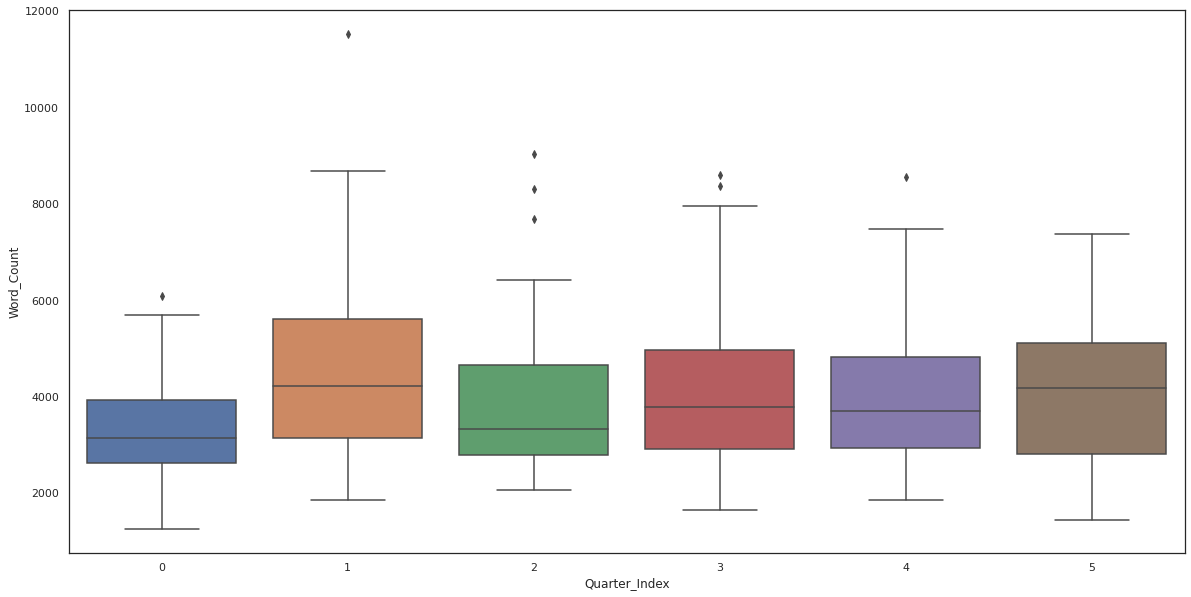

In [32]:
sns.boxplot(x='Quarter_Index', y='Word_Count', data=df)

<AxesSubplot:xlabel='Quarter_Index', ylabel='Graph_Count'>

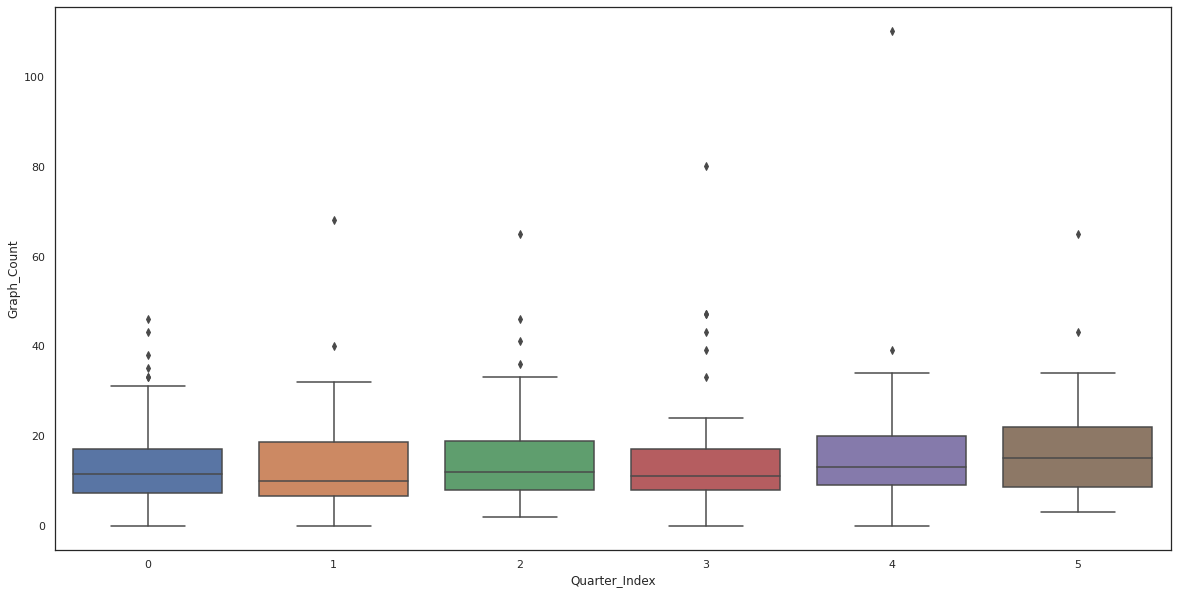

In [34]:
sns.boxplot(x='Quarter_Index', y='Graph_Count', data=df)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16     True
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41     True
42    False
Name: Table_Count, dtype: bool


KeyError: False

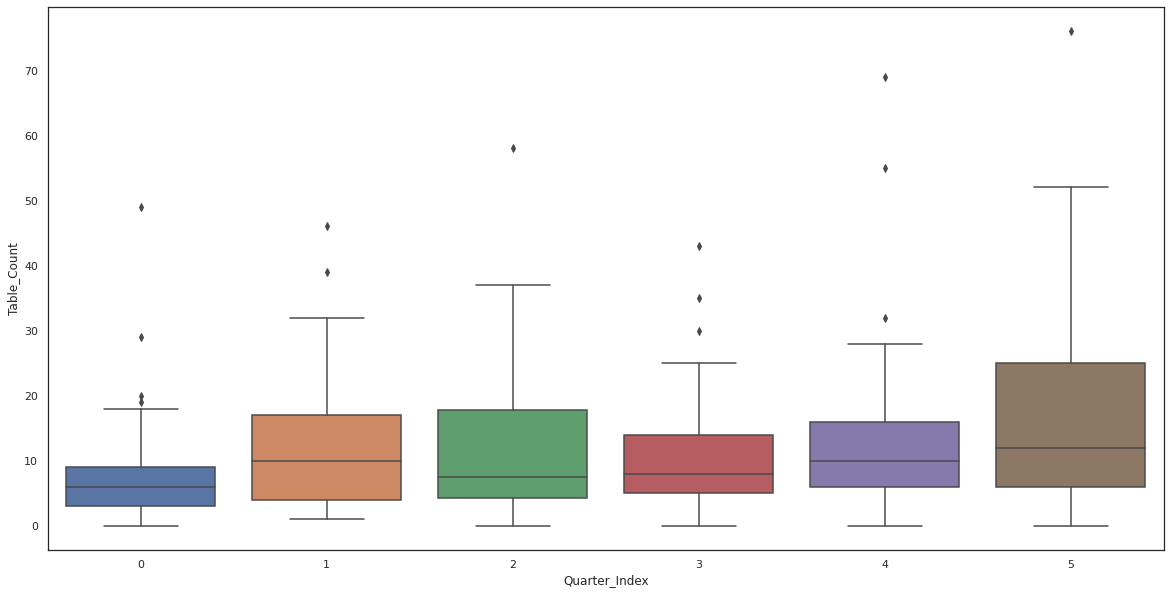

In [67]:
sns.boxplot(x='Quarter_Index', y='Table_Count', data=df)
outliers = [y for stat in boxplot_stats(df[df['Quarter_Index'] == 1]['Table_Count']) for y in stat['fliers']]
print(df[df['Quarter_Index'] == 1]['Table_Count'].isin(outliers))
df[df['Quarter_Index' == 1][df[df['Quarter_Index'] == 1]['Table_Count'].isin(outliers)]]['Special']
